# Analyse résultats concours CCMP

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import seaborn
seaborn.set()

## Analyse toutes filières confondues

In [2]:
CCMP = pd.DataFrame()
CCMP_stats = pd.DataFrame()

for year in range(2002,2022):
    for filiere in ['MP', 'PC', 'PSI']:
        df = pd.read_csv("../src/stats_generales/"+str(year)+"/"+str(year)+"_"+filiere+".tsv", sep='\t')
        CCMP_y = df.loc[df['banque'].isin(["CONC. COMM. MINES-PONTS","CONCOURS COMMUN MINES-PONTS"])]
        CCMP_s = CCMP_y[-1:]
        CCMP = CCMP.append(CCMP_y)
        CCMP_stats = CCMP_stats.append(CCMP_s)
CCMP_stats = CCMP_stats.set_index('year').iloc[:, 3:].replace('¥', 'NaN').astype(float)

In [3]:
CCMP_stats_gen = pd.DataFrame(columns=CCMP_stats.columns)

for year in range(2002,2022):
    L = []
    for col in CCMP_stats.columns:
        if col[-2:] == 'nb' or col == 'places':
            L.append(sum(CCMP_stats[CCMP_stats.index == year][col]))
        else:
            if col[:8] == 'inscrits':
                z = 100 * sum(CCMP_stats[CCMP_stats.index == year][col] * CCMP_stats[CCMP_stats.index == year]['inscrits_nb'] / 100)/ sum(CCMP_stats[CCMP_stats.index == year]['inscrits_nb'])
            if col[:11] == 'admissibles':
                z = 100 * sum(CCMP_stats[CCMP_stats.index == year][col] * CCMP_stats[CCMP_stats.index == year]['admissibles_nb'] / 100)/ sum(CCMP_stats[CCMP_stats.index == year]['admissibles_nb'])
            if col[:7] == 'classes':
                z = 100 * sum(CCMP_stats[CCMP_stats.index == year][col] * CCMP_stats[CCMP_stats.index == year]['classes_nb'] / 100)/ sum(CCMP_stats[CCMP_stats.index == year]['classes_nb'])
            if col[:8] == 'integres':
                z = 100 * sum(CCMP_stats[CCMP_stats.index == year][col] * CCMP_stats[CCMP_stats.index == year]['integres_nb'] / 100)/ sum(CCMP_stats[CCMP_stats.index == year]['integres_nb'])
            L.append(z)
    CCMP_stats_gen.loc[year] = L

CCMP_stats_gen = CCMP_stats_gen.drop(['appeles', 'rg_dernier_appele', 'integres_rg_median', 'integres_rg_moyen'], axis=1)
CCMP_stats_gen = CCMP_stats_gen.round()

In [4]:
CCMP_stats_gen

,inscrits_nb,inscrits_filles,inscrits_cinq_demi,admissibles_nb,admissibles_filles,admissibles_cinq_demi,classes_nb,classes_filles,classes_cinq_demi,integres_nb,integres_filles,integres_cinq_demi,places
2002,9972.0,22.0,29.0,3309.0,17.0,34.0,3192.0,18.0,35.0,NaN,NaN,NaN,922.0
2003,10511.0,22.0,28.0,3434.0,17.0,31.0,3339.0,17.0,31.0,NaN,NaN,NaN,926.0
2004,10564.0,23.0,28.0,3436.0,19.0,30.0,3330.0,19.0,31.0,NaN,NaN,NaN,906.0
2005,10500.0,23.0,28.0,3414.0,20.0,30.0,3320.0,20.0,30.0,870.0,NaN,NaN,876.0
2006,10496.0,23.0,28.0,3431.0,21.0,32.0,3337.0,21.0,31.0,888.0,NaN,NaN,884.0
2007,10576.0,24.0,29.0,3430.0,19.0,31.0,3329.0,20.0,31.0,884.0,NaN,NaN,885.0
2008,10627.0,23.0,28.0,3494.0,19.0,28.0,3346.0,19.0,28.0,919.0,NaN,NaN,891.0
2009,10913.0,24.0,26.0,3576.0,19.0,28.0,3400.0,19.0,28.0,927.0,NaN,NaN,936.0
2010,11549.0,24.0,26.0,3595.0,17.0,29.0,3411.0,17.0,29.0,970.0,NaN,NaN,975.0
2011,12233.0,24.0,27.0,3710.0,18.0,30.0,3560.0,18.0,30.0,955.0,NaN,NaN,966.0


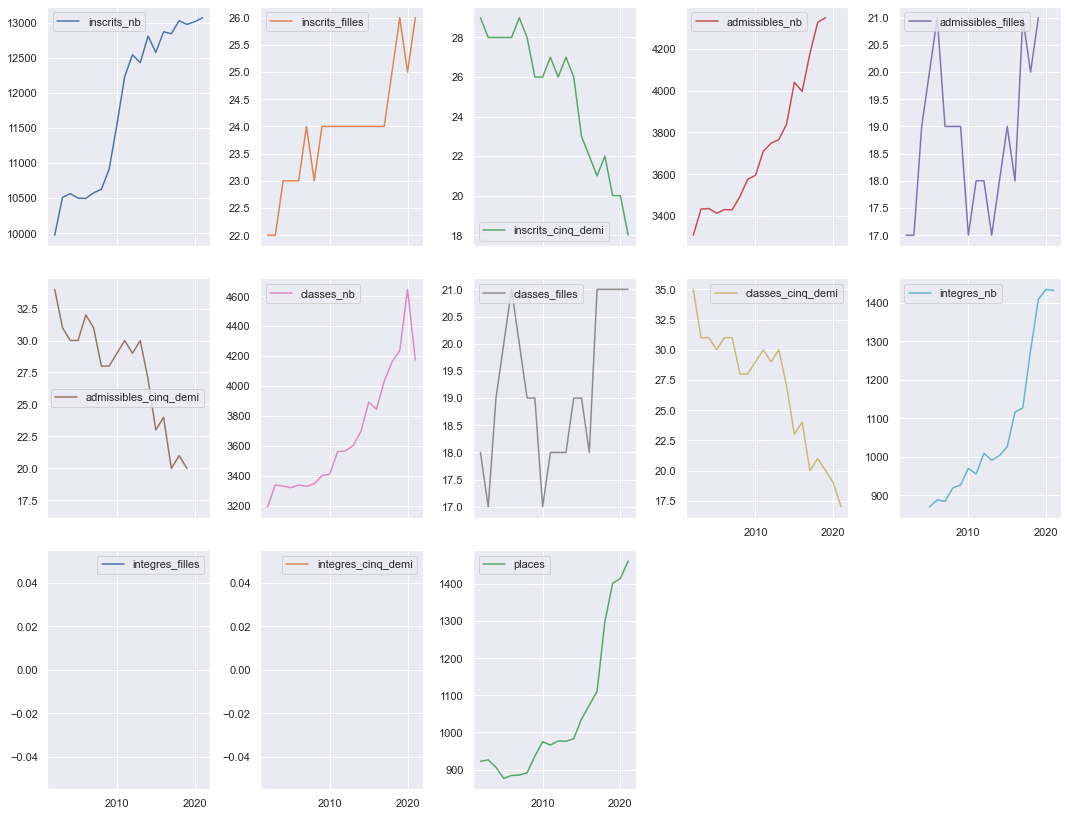

In [5]:
CCMP_stats_gen.astype(float).plot(subplots=True, layout=(4,5), figsize=(15,15))
plt.tight_layout()
plt.show()

## Analyse stats pour une filière

In [6]:
filiere = 'MP'

CCMP = pd.DataFrame()
CCMP_stats = pd.DataFrame()


for year in range(2002,2022):
    year = str(year)
    df = pd.read_csv("../src/stats_generales/"+year+"/"+year+"_"+filiere+".tsv", sep='\t')
    CCMP_y = df.loc[df['banque'].isin(["CONC. COMM. MINES-PONTS","CONCOURS COMMUN MINES-PONTS"])]
    CCMP_s = CCMP_y[-1:]
    CCMP = CCMP.append(CCMP_y)
    CCMP_stats = CCMP_stats.append(CCMP_s)

In [7]:
CCMP_stats = CCMP_stats.iloc[:, :13]
CCMP_stats = CCMP_stats.set_index('year')

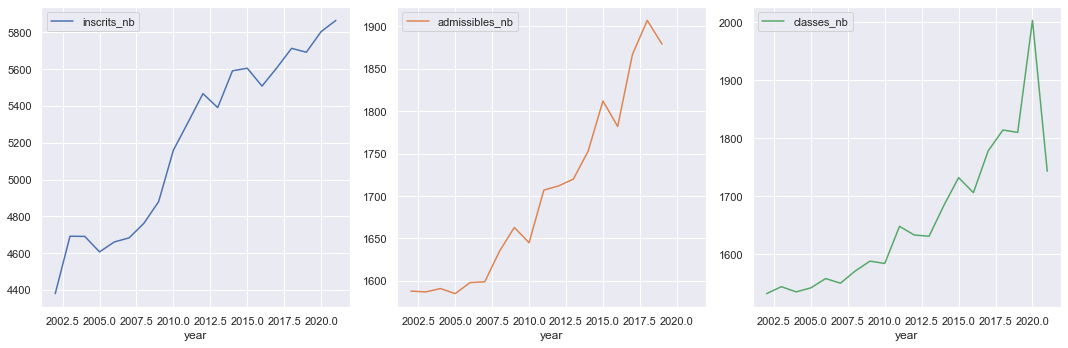

In [8]:
CCMP_stats[['inscrits_nb', 'admissibles_nb', 'classes_nb']].astype(float).plot(subplots=True, layout=(1,3), figsize=(15,5))
plt.tight_layout()
plt.show()

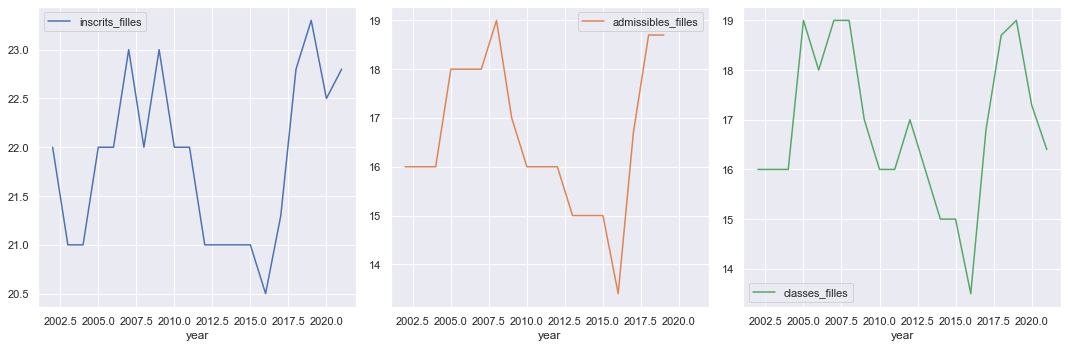

In [9]:
CCMP_stats[['inscrits_filles', 'admissibles_filles', 'classes_filles']].astype(float).plot(subplots=True, layout=(1,3), figsize=(15,5))
plt.tight_layout()
plt.show()

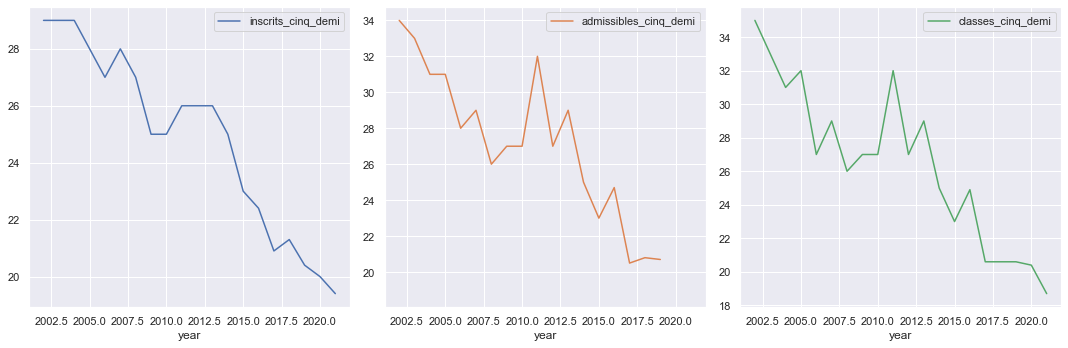

In [10]:
CCMP_stats[['inscrits_cinq_demi', 'admissibles_cinq_demi', 'classes_cinq_demi']].astype(float).plot(subplots=True, layout=(1,3), figsize=(15,5))
plt.tight_layout()
plt.show()

## Analyse principales ecoles pour une filière

In [11]:
TelecomP = CCMP.loc[CCMP['ecole'].isin(["ENST cursus Paris", "ENST Cursus Paris", "Télécom ParisTech","TELECOM ParisTech cursus Paris","TELECOM Paris"])].set_index('year')
Ponts = CCMP.loc[CCMP['ecole'].isin(["Ponts et Chaussees", "Ponts et Chaussées","Ponts et Chausses","PONTS ParisTech"])].set_index('year')
SupAero = CCMP.loc[CCMP['ecole'].isin(["SUPAERO Toulouse", "SUPAERO","ISAE-SUPAERO Toulouse","SUPAERO (ISAE) Toulouse"])].set_index('year')
MinesP = CCMP.loc[CCMP['ecole'].isin(["MINES Paris","MINES ParisTech"])].set_index('year')
ENSTA = CCMP.loc[CCMP['ecole'].isin(["Techniques Avancees","Techniques avancées", "Techniques avances","ENSTA ParisTech","ENSTA Paris"])].set_index('year')

CCMP_ecole = [TelecomP, Ponts, SupAero, MinesP, ENSTA]
Ponts.name = 'Ponts'
TelecomP.name = 'TelecomP'
SupAero.name = 'SupAero'
MinesP.name = 'MinesP'
ENSTA.name = 'ENSTA'

Ponts.color = 'gray'
TelecomP.color = 'firebrick'
SupAero.color = 'seagreen'
MinesP.color = 'cornflowerblue'
ENSTA.color = 'midnightblue'

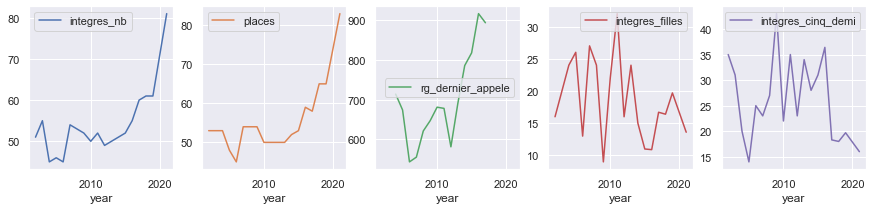

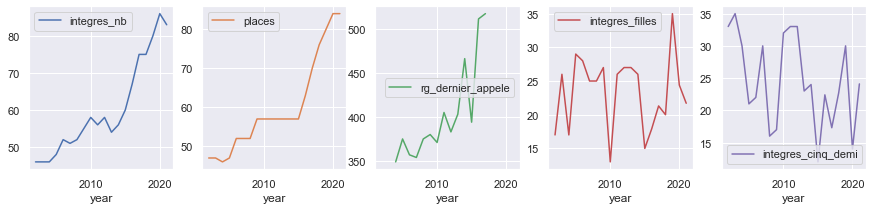

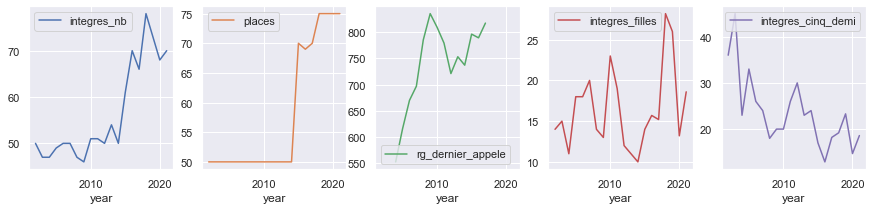

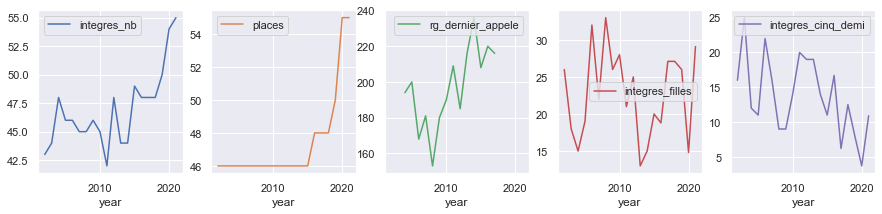

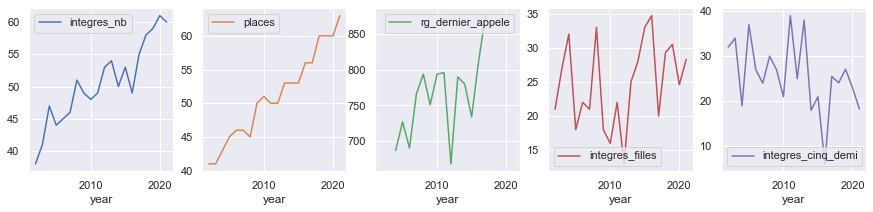

In [12]:
for e in CCMP_ecole:
    e[['integres_nb', 'places', 'rg_dernier_appele', 'integres_filles', 'integres_cinq_demi']].astype(float).plot(subplots=True, layout=(1,5), figsize=(15,3))
plt.show()

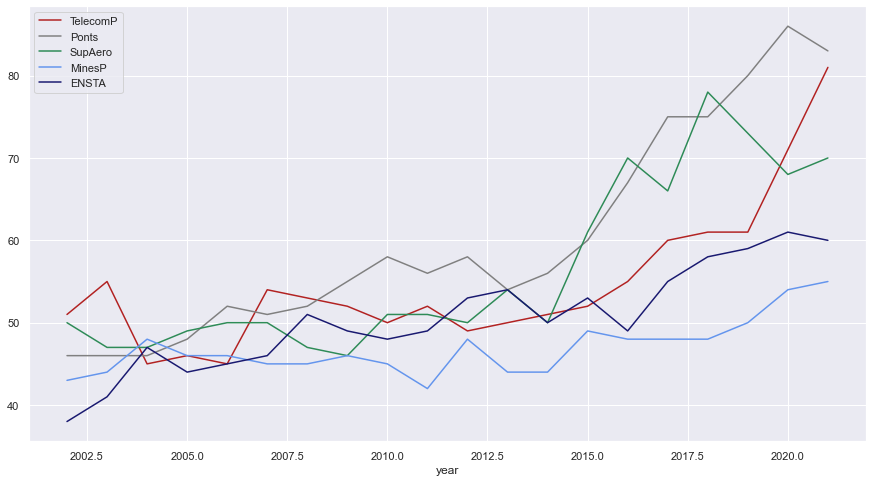

In [13]:
for e in CCMP_ecole:
    e['integres_nb'].astype(float).plot(subplots=True, figsize=(15,8), label=e.name, color = e.color)
    
plt.legend()
plt.show()

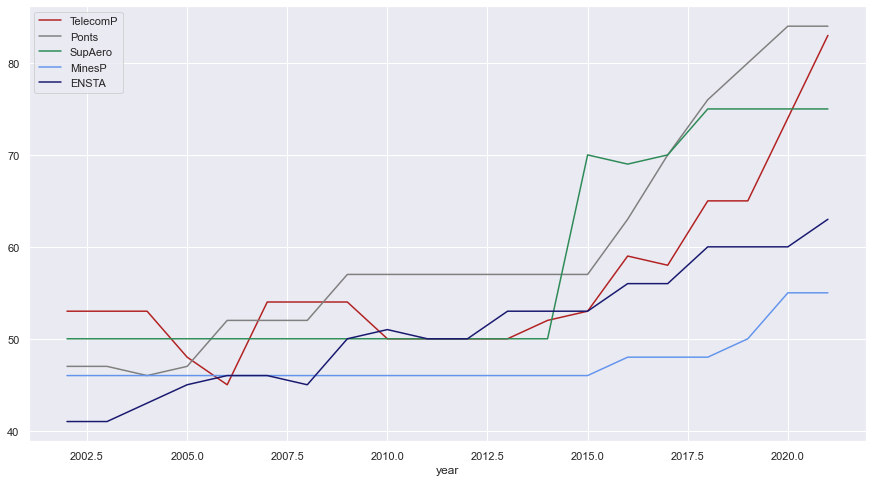

In [14]:
for e in CCMP_ecole:
    e['places'].astype(float).plot(subplots=True, figsize=(15,8), label=e.name, color = e.color)
    
plt.legend()
plt.show()

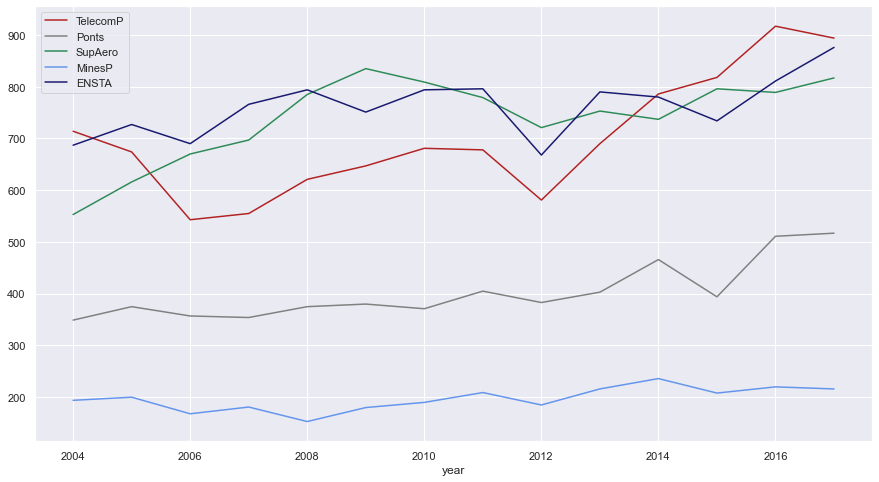

In [15]:
for e in CCMP_ecole:
    e['rg_dernier_appele'].astype(float).plot(subplots=True, figsize=(15,8), label=e.name, color = e.color)
    
plt.legend()
plt.show()

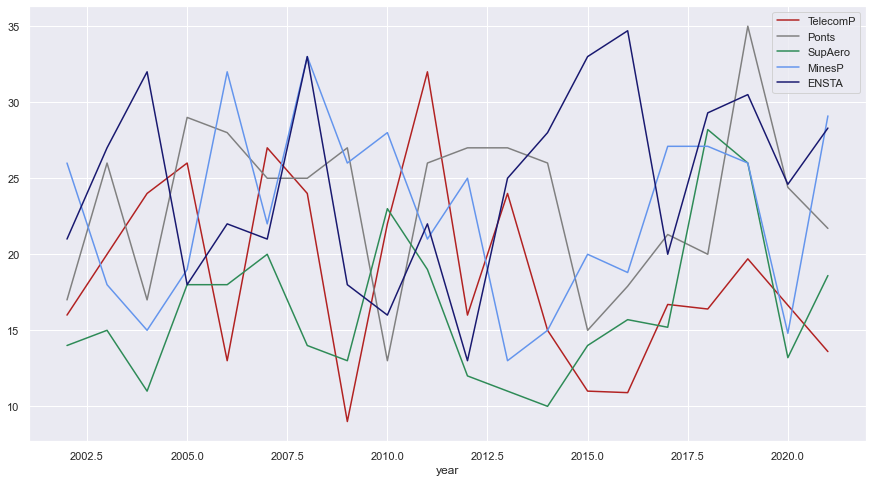

In [16]:
for e in CCMP_ecole:
    e['integres_filles'].astype(float).plot(subplots=True, figsize=(15,8), label=e.name, color = e.color)
    
plt.legend()
plt.show()

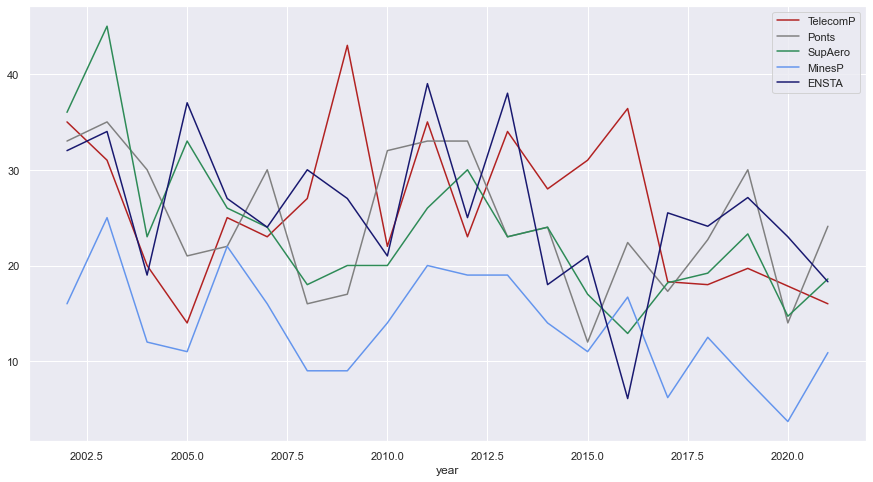

In [17]:
for e in CCMP_ecole:
    e['integres_cinq_demi'].astype(float).plot(subplots=True, figsize=(15,8), label=e.name, color = e.color)
    
plt.legend()
plt.show()